# Linear Regression Basics

This notebook is based on the exercises in the Anaconda training [Getting started with AI and ML](https://learning.anaconda.cloud/getting-started-with-ai-ml).

I'm copying my notes here as a more in-depth test of the ability to publish directly from Jupyter notebooks, and also to put my notes somewhere I can access them later!

##  Linear Regression

The most commonly used supervised machine learning algorithm. 

This module covered: 

- Fit a line to data
- Measure loss with residuals and sum of squares
- Use `scikit-learn`` to fit a linear regression
- Evaluate a linear regression using R2 and train-test splits 

### Advantages

- simple to understand and interpret 
- doesn't over-fit

### When is Linear Regression suitable?

1. variables are continuous, not binary or categorical (use logistic regression for the latter)
2. input variables follow a Gaussian (bell curve) distribution
3. input variables are relevant to the output variables and _not_ highly correlated with each other (collinearity)


### Simple Linear Regression

ML often splits into two tasks - **regression** (predict quantity) and **classification** (predict a category)

E.g $y = mx+b$

Challenge is to define `m` and `b` for "best fit"

### Multiple linear regression

With multiple independent variables

e.g. $y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \epsilon$

$\epsilon $ is error due to noise

Multiple variables can get complex, important to use tools to help select only input variables correlated with the output variables.

e.g.:

- Pearson correlation and $R^2$
- adjusted $R^2$
- Akakike Information Criterion
- Ridge and lasso regression

#furtherlearning

### Residuals

**Residuals** are the difference between the data points and the equivalent regression. Linear Regression models aim to minimise the regressions by optimising a **loss function** such as Sum of Squares.  

### Overfitting

When ML model works well with training data but fails to predict correctly with  new data. Linear regression tends to show low variance and high bias, so less likely to be overfitted. *(define terms variance and bias)*

### Train/Test Splits

Common technique to mitigate overfitting is the use of train/test splits. Training data is used to fit the model, then test data is used to test it with previously-unseen data, if necessary the model can then be tweaked.

### Evaluating the model with $R^2$

$R^2$ (the **coefficient of determination**) ratios the average y-value to the average of the residuals. 

It measures how well the independent variables explain a dependent variable, with **0.0** meaning no connection and **1.0** meaning a perfect explanation.

## Example using `scikit-learn`

The package `scikit-learn` contains many tools to support Machine LEarning techniquies such as Linear Regression.

This worked example demonstrates some of them.

First we import the packages we are going to use, making use of two key utilities from `scikit-learn`:

- [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) makes it easy to split a set of data into training and test subsets.
- [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In [28]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

We need to import our data into a pandas DataFrame. For convenience I am using one of the [datasets provided by the course author](https://github.com/thomasnield/machine-learning-demo-data/)

In [29]:
# Load the data
df = pd.read_csv('https://bit.ly/3pBKSuN', delimiter=",")
df

,x,y
0,1,-13.115843
1,2,25.806547
2,3,-5.017285
3,4,20.256415
4,5,4.075003
5,6,-3.530260
6,7,24.045999
7,8,22.112566
8,9,5.968591
9,10,43.392339


We need to split our data into inputs and the associated outputs

In [30]:
# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)
Y = df.values[:, -1]

We then need to create separate training and testing data to evaluate performance and reduce overfitting.
Her ewe make use of the [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) utility.

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1.0/3.0, random_state=10)

Next:
- we train the standard [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) model provided by `scikit-learn` against our training data
- then we use the trained model to fit a regression to our test data

The utility allows us to easily score the model using $R^2$.

In [32]:
model = LinearRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("R^2: %.3f" % result)

R^2: 0.182


Using `matplotlib` we can visualise the model output against the whole input data set

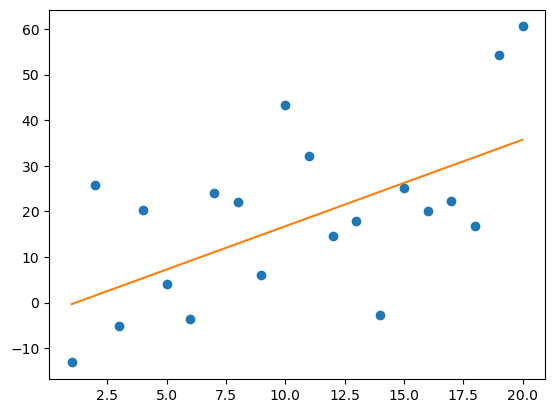

In [33]:
import matplotlib.pyplot as plt

plt.plot(X, Y, 'o') # scatterplot
plt.plot(X, model.coef_.flatten()*X+model.intercept_.flatten()) # line
plt.show()